In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


**Loadin the Dataset**

In [39]:
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Label Encoding for categorical columns
label_cols = ['mainroad', 'guestroom', 'basement',
              'hotwaterheating', 'airconditioning',
              'prefarea', 'furnishingstatus']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split into X (features) and y (target)
X = df.drop('price', axis=1)
y = df['price']




**Split Data Into Train-Test Test**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Fit a Linear Regression model using sklearn.linear_model**

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

# Show coefficients and intercept
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Intercept: 293083.0691506695

Coefficients:
area: 235.85
bedrooms: 78574.49
bathrooms: 1097117.27
stories: 406223.16
mainroad: 366824.19
guestroom: 233146.77
basement: 393159.78
hotwaterheating: 687881.31
airconditioning: 785550.58
parking: 225756.51
prefarea: 629901.66
furnishingstatus: -210397.12


**Evaluate the Model using MAE, MSE, R²**

In [46]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")



Model Evaluation:
Mean Absolute Error (MAE): 979679.69
Mean Squared Error (MSE): 1771751116594.03
R² Score: 0.6495


**Plot regression line and interpret coefficients**

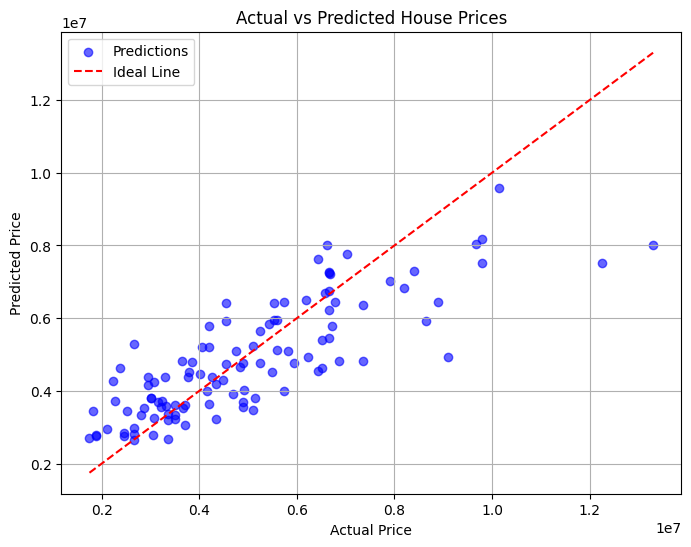

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()


In [48]:
# Example new house input (must match the order and encoding of X)
new_house = [[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 0]]  # Adjust these values as needed

new_pred = model.predict(new_house)
print("\nPredicted price for the new house:", new_pred[0])



Predicted price for the new house: 8004072.411540006


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
